<a href="https://colab.research.google.com/github/AnandSinhaProjects/LearningDL/blob/main/Code/CV/human_or_horse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
!gdown --id 1onaG42NZft3wCE1WH0GDEbUhu75fedP5

Downloading...
From: https://drive.google.com/uc?id=1onaG42NZft3wCE1WH0GDEbUhu75fedP5
To: /content/horse-or-human.zip
150MB [00:00, 208MB/s]


In [21]:
import os
import zipfile

local_zip = './horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./horse-or-human')
zip_ref.close()

In [22]:
train_horses_dir = '/content/horse-or-human/horses'

train_human_dir = '/content/horse-or-human/humans'

In [23]:
train_horse_names = os.listdir(train_horses_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

['horse42-3.png', 'horse24-9.png', 'horse08-8.png', 'horse02-6.png', 'horse36-0.png', 'horse48-2.png', 'horse25-5.png', 'horse47-8.png', 'horse37-9.png', 'horse19-6.png']
['human11-25.png', 'human07-05.png', 'human06-21.png', 'human14-19.png', 'human05-30.png', 'human01-13.png', 'human13-20.png', 'human04-00.png', 'human03-01.png', 'human16-09.png']


In [24]:
print('Number of horses :', len(os.listdir('/content/horse-or-human/horses')))

print('Number of humans :', len(os.listdir('/content/horse-or-human/humans')))

Number of horses : 500
Number of humans : 527


In [25]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

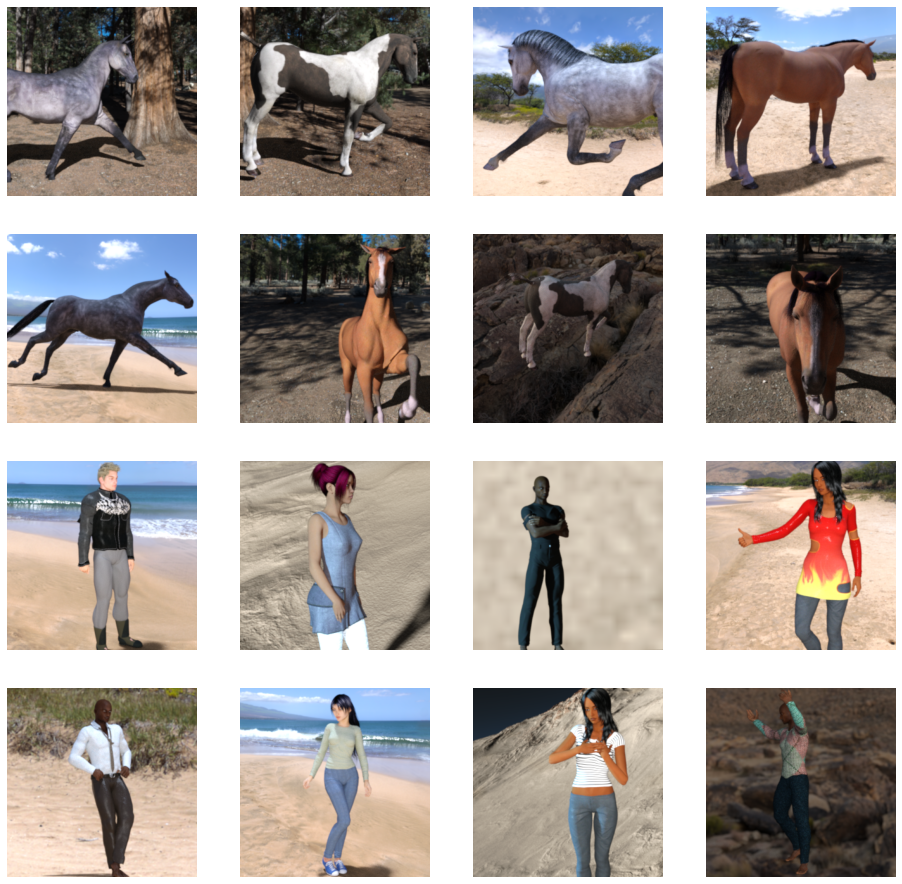

In [26]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horses_dir, fname) 
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


In [27]:
import tensorflow as tf

In [28]:
model= tf.keras.models.Sequential([
                                   tf.keras.layers.Conv2D(16, (3,3), activation="relu", input_shape = (300,300,3)),
                                   tf.keras.layers.MaxPooling2D(2,2),
                                   tf.keras.layers.Conv2D(32, (3,3), activation="relu"),
                                   tf.keras.layers.MaxPooling2D(2,2),
                                   tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
                                   tf.keras.layers.MaxPooling2D(2,2),
                                   tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
                                   tf.keras.layers.MaxPooling2D(2,2),
                                   tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
                                   tf.keras.layers.MaxPooling2D(2,2),
                                   tf.keras.layers.Flatten(),
                                   tf.keras.layers.Dense(512, activation="relu"),
                                   tf.keras.layers.Dense(1, activation="sigmoid")
])

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        3

In [30]:
from tensorflow.keras.optimizers import RMSprop

model.compile(
    loss='binary_crossentropy',
    optimizer=RMSprop(learning_rate=0.001),
    metrics=['accuracy']
)

In [31]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        './horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')


Found 1027 images belonging to 2 classes.


In [32]:
history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=15,
      verbose=1)

Epoch 1/15
8/8 [==============================] - 23s 602ms/step - loss: 1.1333 - accuracy: 0.4961
Epoch 2/15
8/8 [==============================] - 6s 672ms/step - loss: 0.6649 - accuracy: 0.6607
Epoch 3/15
8/8 [==============================] - 6s 678ms/step - loss: 1.7579 - accuracy: 0.7130
Epoch 4/15
8/8 [==============================] - 6s 785ms/step - loss: 0.4099 - accuracy: 0.8131
Epoch 5/15
8/8 [==============================] - 6s 672ms/step - loss: 0.2457 - accuracy: 0.8988
Epoch 6/15
8/8 [==============================] - 6s 674ms/step - loss: 0.2235 - accuracy: 0.9143
Epoch 7/15
8/8 [==============================] - 6s 782ms/step - loss: 0.3550 - accuracy: 0.8788
Epoch 8/15
8/8 [==============================] - 6s 678ms/step - loss: 1.1468 - accuracy: 0.7942
Epoch 9/15
8/8 [==============================] - 6s 686ms/step - loss: 0.1890 - accuracy: 0.9566
Epoch 10/15
8/8 [==============================] - 6s 663ms/step - loss: 0.1168 - accuracy: 0.9544
Epoch 11/15
8/8 [=